In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from ECM_model import ECM

In [2]:
model = ECM()

def eta_function(i):
    return 1 * (i >= 0) + 0.99 * (i < 0)
    
def M_function(i):
    return 0.1 * (i >= 0) - 0.1 * (i < 0)

parameter_values = pybamm.ParameterValues(
    {'Ambient temperature [K]': 298.15,
    'Capactior [F]': 38000, 
    'Charge efficiency': eta_function, 
    'Equivalent series resistance in R_0 [Ohm]': 0.0082,
    'Equivalent series resistance in R_1 [Ohm]': 0.0158,
    'Maximum polarisation due to hysteresis': M_function, 
    'Negative electrode thickness [m]': 8.52e-05, 
    'Negative particle radius [m]': 5.86e-06,
    'Nominal cell capacity [A.h]': 5.0,
    'Number of cells connected in series to make a battery': 1.0, 
    'Positive electrode thickness [m]': 7.56e-05,
    'Positive particle radius [m]': 5.22e-06,
    'Rate constant': 2,
    'Separator thickness [m]': 1.2e-05,
    'Total charge capacity [C]': 5,
    'citations': ['Chen2020']}
)

2024-07-09 19:37:45.433 - [WARNING] simulation.solve(590): Ignoring t_eval as solution times are specified by the experiment


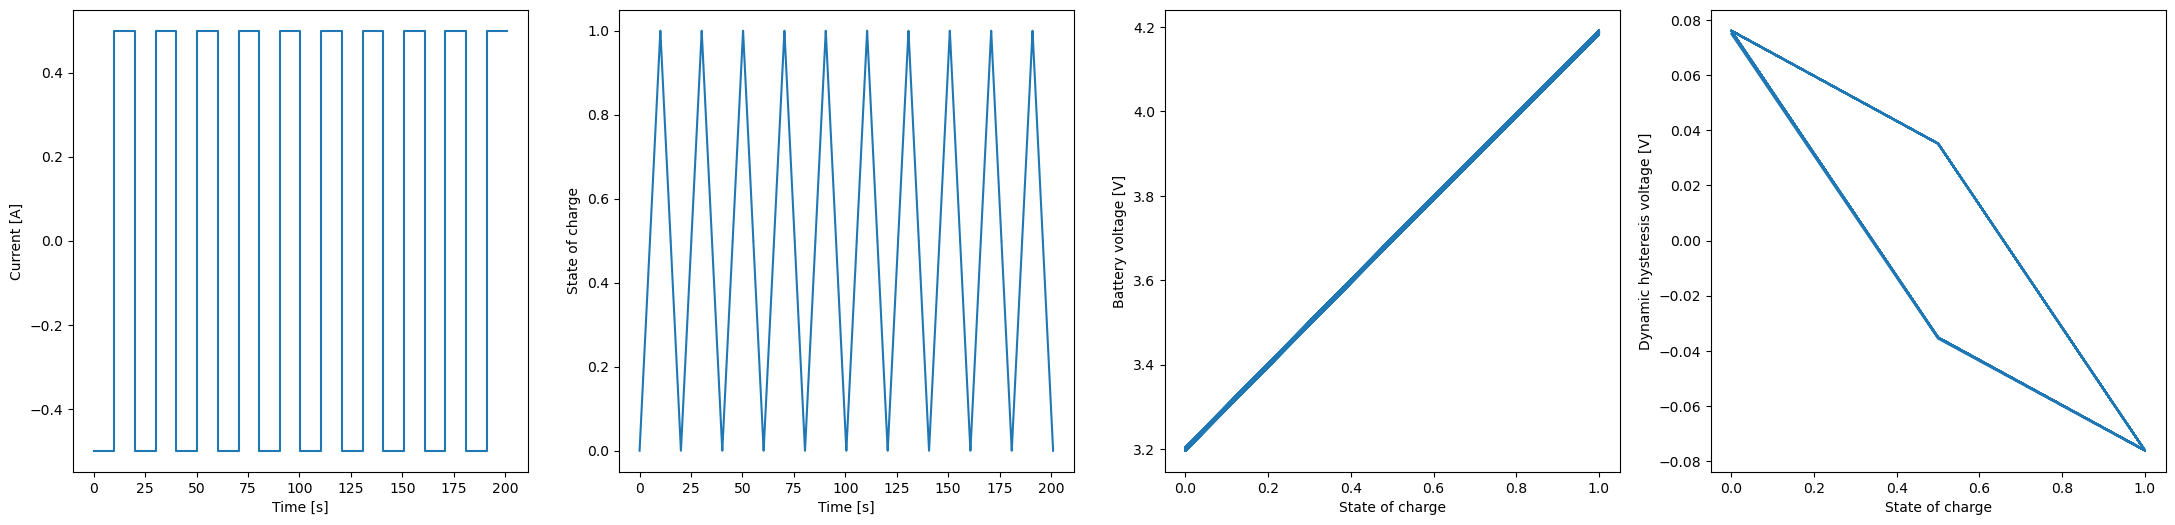

In [3]:
experiment = pybamm.Experiment(
    ([(f"Charge at C/10 for 5.0505 seconds")] + [(f"Charge at C/10 for 5.0505 seconds")]
    + [(f"Discharge at C/10 for 5 seconds")] + [(f"Discharge at C/10 for 5 seconds")])*10,
)

'''experiment = pybamm.Experiment(
    ([(f"Charge at C/10 for 10 seconds")] + [(f"Discharge at C/10 for 10 seconds or until 2 V")])
)'''

'''experiment = pybamm.Experiment(
    ([(f"Charge at C/10 for 5 seconds")] + [(f"Discharge at C/10 for 5 seconds")])*5,
)'''

sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)
sol = sim.solve(calc_esoh=False)

fig, ax = plt.subplots(1, 4, figsize=(27, 6))
t = sol["Time [s]"].data
i = sol["Current variable [A]"].data
V = sol["Battery voltage [V]"].data
h = sol["Dynamic hysteresis voltage [V]"].data
z = sol["State of charge"].data

ax[0].plot(t, i)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Current [A]")

ax[1].plot(t, z)
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("State of charge")

ax[2].plot(z, V)
ax[2].set_xlabel("State of charge")
ax[2].set_ylabel("Battery voltage [V]")

ax[3].plot(z, h)
ax[3].set_xlabel("State of charge")
ax[3].set_ylabel("Dynamic hysteresis voltage [V]")

plt.show()

In [4]:
h

array([ 0.075     , -0.03557973, -0.03557973, -0.0762609 , -0.0762609 ,
        0.03512072,  0.03512072,  0.07609648,  0.07609648, -0.03518246,
       -0.03518246, -0.07612392, -0.07612392,  0.03517138,  0.03517138,
        0.07611294,  0.07611294, -0.03517128, -0.03517128, -0.07611622,
       -0.07611622,  0.03516835,  0.03516835,  0.07611434,  0.07611434,
       -0.03516657, -0.03516657, -0.07610993, -0.07610993,  0.03517126,
        0.03517126,  0.07611278,  0.07611278, -0.03517051, -0.03517051,
       -0.07611297, -0.07611297,  0.03517593,  0.03517593,  0.07611509,
        0.07611509, -0.0351702 , -0.0351702 , -0.0761129 , -0.0761129 ,
        0.03516831,  0.03516831,  0.07611468,  0.07611468, -0.03516774,
       -0.03516774, -0.07611394, -0.07611394,  0.03517119,  0.03517119,
        0.07611343,  0.07611343, -0.03516831, -0.03516831, -0.07611643,
       -0.07611643,  0.03517875,  0.03517875,  0.07612149,  0.07612149,
       -0.03516576, -0.03516576, -0.07611511, -0.07611511,  0.03

In [5]:
z

array([ 0.00000000e+00,  4.99999500e-01,  4.99999500e-01,  9.99999000e-01,
        9.99999000e-01,  4.99999000e-01,  4.99999000e-01, -9.99899000e-07,
       -9.99899000e-07,  4.99998500e-01,  4.99998500e-01,  9.99998000e-01,
        9.99998000e-01,  4.99998000e-01,  4.99998000e-01, -1.99989700e-06,
       -1.99989700e-06,  4.99997500e-01,  4.99997500e-01,  9.99997000e-01,
        9.99997000e-01,  4.99997000e-01,  4.99997000e-01, -2.99989500e-06,
       -2.99989500e-06,  4.99996500e-01,  4.99996500e-01,  9.99996000e-01,
        9.99996000e-01,  4.99996000e-01,  4.99996000e-01, -3.99989300e-06,
       -3.99989300e-06,  4.99995500e-01,  4.99995500e-01,  9.99995000e-01,
        9.99995000e-01,  4.99995000e-01,  4.99995000e-01, -4.99989101e-06,
       -4.99989101e-06,  4.99994500e-01,  4.99994500e-01,  9.99994000e-01,
        9.99994000e-01,  4.99994000e-01,  4.99994000e-01, -5.99988901e-06,
       -5.99988901e-06,  4.99993500e-01,  4.99993500e-01,  9.99993000e-01,
        9.99993000e-01,  

In [6]:
t

array([  0.    ,   5.0505,   5.0505,  10.101 ,  10.101 ,  15.101 ,
        15.101 ,  20.101 ,  20.101 ,  25.1515,  25.1515,  30.202 ,
        30.202 ,  35.202 ,  35.202 ,  40.202 ,  40.202 ,  45.2525,
        45.2525,  50.303 ,  50.303 ,  55.303 ,  55.303 ,  60.303 ,
        60.303 ,  65.3535,  65.3535,  70.404 ,  70.404 ,  75.404 ,
        75.404 ,  80.404 ,  80.404 ,  85.4545,  85.4545,  90.505 ,
        90.505 ,  95.505 ,  95.505 , 100.505 , 100.505 , 105.5555,
       105.5555, 110.606 , 110.606 , 115.606 , 115.606 , 120.606 ,
       120.606 , 125.6565, 125.6565, 130.707 , 130.707 , 135.707 ,
       135.707 , 140.707 , 140.707 , 145.7575, 145.7575, 150.808 ,
       150.808 , 155.808 , 155.808 , 160.808 , 160.808 , 165.8585,
       165.8585, 170.909 , 170.909 , 175.909 , 175.909 , 180.909 ,
       180.909 , 185.9595, 185.9595, 191.01  , 191.01  , 196.01  ,
       196.01  , 201.01  ])